# Exercícios da Aula 3 - Edmur C. Neto - 12558492

1 - Para os dados gerados pelo código abaixo, ajuste um modelo de regressão polinomial considerando um polinômio de grau 3 e 5. Qual oferece o melhor ajuste em termos do coeficiente R²?

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


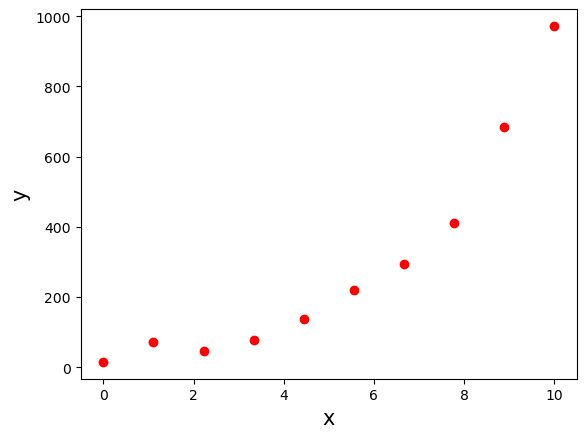

In [3]:
N = 10
x = []
x = np.linspace(0,10,N)
y = x**3 + np.random.normal(0,50, N)
plt.plot(x,y, 'ro')
plt.ylabel("y", fontsize=15)
plt.xlabel("x", fontsize=15)

plt.show(True)

Para construir um modelo de regressão, sabemos que os dados y deverão seguir algo como $y_i = b_0 + b_1 x_i³ + \epsilon$ ou $y_i = b_0 + b_1 x_i⁵ + \epsilon$, desse modo, criamos colunas para treinar um modelo que minimize os erros.

In [4]:
# Transforma os dados para o treinamento

transforme_3 = PolynomialFeatures(degree=3, include_bias=False)
transforme_5 = PolynomialFeatures(degree=5, include_bias=False)

x = x.reshape((-1,1))
transforme_3.fit(x)
transforme_5.fit(x)

x_3 = transforme_3.transform(x)
x_5 = transforme_5.transform(x)



Dessa forma, temos os dados de x, x², ..., x⁵, prontos para encontrar os coeficientes correspondentes.

In [5]:
# Construindo o modelo

model_3 = LinearRegression().fit(x_3, y)
model_5 = LinearRegression().fit(x_5, y)

y_3 = model_3.predict(x_3)
y_5 = model_5.predict(x_5)

Após a construção do modelo e realizações de predições, plotamos o gráfico da correspondência entre os pontos do modelo e os pontos reais de y:

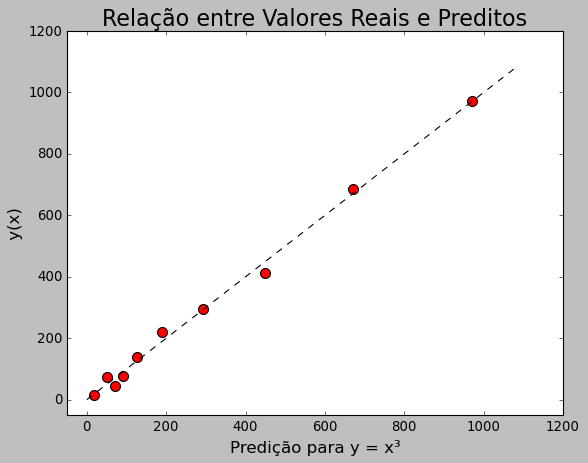

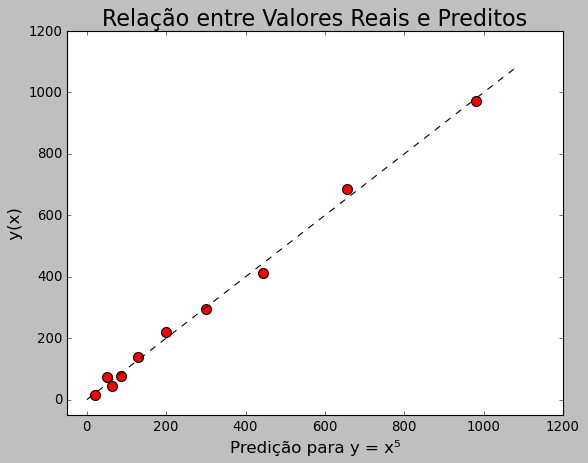

In [6]:
xl = np.arange(0,1200, 120)
yl = xl

plt.style.use("classic")
plt.title("Relação entre Valores Reais e Preditos", fontsize=20)
plt.xlabel("Predição para y = x³", fontsize=15)
plt.ylabel(" y(x) ", fontsize = 15)
plt.scatter(y_3, y, c="r", s=80)
plt.plot(xl, yl, linestyle="--",c="black")
plt.xlim(-50,1200)
plt.ylim(-50,1200)
plt.show()

plt.style.use("classic")
plt.title("Relação entre Valores Reais e Preditos", fontsize=20)
plt.xlabel("Predição para y = x⁵", fontsize=15)
plt.ylabel(" y(x) ", fontsize = 15)
plt.scatter(y_5, y, c="r", s=80)
plt.plot(xl, yl, linestyle="--",c="black")
plt.xlim(-50,1200)
plt.ylim(-50,1200)
plt.show()

Podemos avaliar os dados para os modelos obtidos:

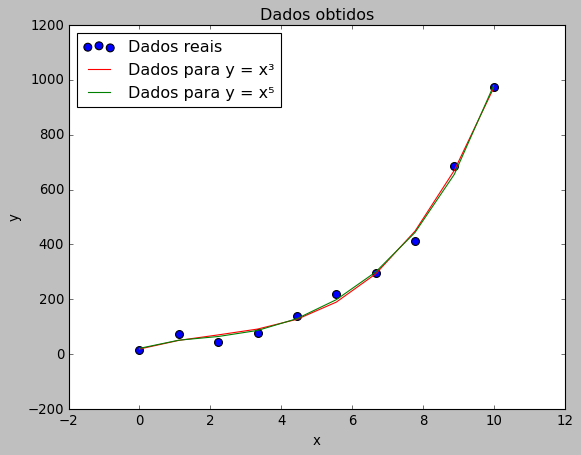

In [7]:
plt.scatter(x,y, s=50, label="Dados reais")
plt.plot(x, y_3, linestyle="-", c="red", label="Dados para y = x³")
plt.plot(x, y_5, linestyle="-", c="green", label="Dados para y = x⁵")
plt.legend(loc="upper left")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Dados obtidos")
plt.show()

In [8]:
from sklearn.metrics import r2_score
R2_3 = r2_score(y, y_3)
R2_5 = r2_score(y, y_5)

print('R2 para x³:', R2_3)
print('R2 para x⁵:', R2_5)

R2 para x³: 0.9954850610508205
R2 para x⁵: 0.9960516885779518


2 - Ajuste um modelo e realize a inferência para a base de casas de Boston. Faça o diagnóstico e verifique se o modelo é adequado.

In [20]:
df = pd.read_csv("/home/edmurcn/Documentos/MeusProjetos/Fis._Estat._Comp./Intro._Ciencia_Dados/data/BostonHousing.csv", header=0)

print(df.shape)

df.head()


(506, 14)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Transformar os dados em np.array

In [21]:
df = df.to_numpy()
nrow, ncol = df.shape

Y = df[:,-1]
X = df[:,0:ncol-1]


Ajustando o conjunto de teste e de treino do modelo

In [22]:
from sklearn.model_selection import train_test_split

p = 0.2

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=p, random_state=30)

Ajuste dos coeficientes do modelo de regressão no conjunto de treino

In [25]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(x_train, y_train)

y_pred = lm.predict(x_test)

(102,)


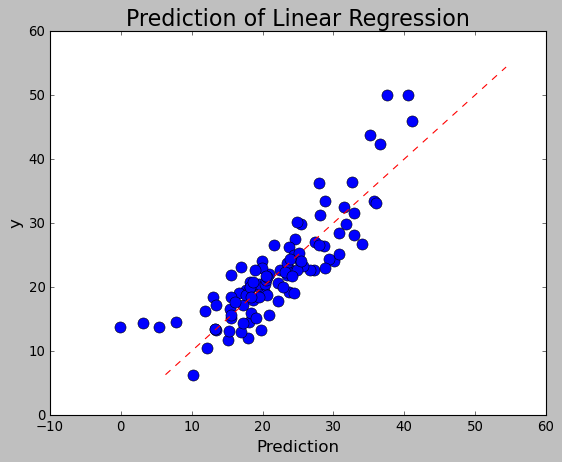

In [30]:
fig = plt.figure()

plt.plot(y_pred, y_test, "bo", markersize=10, markerfacecolor= "C0")
plt.xlabel("Prediction", fontsize=15)
plt.ylabel("y", fontsize=15)

plt.title("Prediction of Linear Regression", fontsize=20)

xl = np.arange(min(y_test), 1.1*max(y_test), (max(y_test) - min(y_test))/10)
yl = xl

plt.plot(xl, yl, "r--")

plt.show()

Pode ainda quantificar a predição

In [31]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_pred)
print("R2", R2)

R2 0.7181173900062044


Obtemos um coeficiente baixo, talvez seja mais promissor alterar algumas características do dataframe, pois assim o modelo ainda não está tão adequado.

Testando outro método

In [48]:
from statsmodels.formula.api import ols

df = pd.read_csv("/home/edmurcn/Documentos/MeusProjetos/Fis._Estat._Comp./Intro._Ciencia_Dados/data/BostonHousing.csv", header=0)

# monta o modelo: y ~ x1 + x2 + ...
model_string =  df.columns[0]
features = df.columns[1:-1]
for s in features:
    model_string = model_string + '+' + s
model_string = df.columns[-1] + '~' + model_string

model = ols(model_string, df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 19 Sep 2023   Prob (F-statistic):          6.72e-135
Time:                        11:27:51   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

Obtemos um R2 praticamente igual, podemos agora analisar os resíduos do modelo.

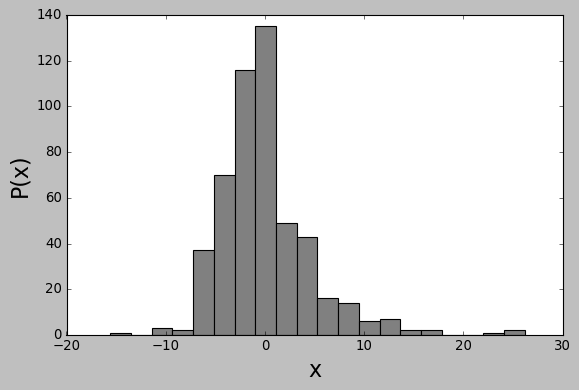

In [49]:
plt.figure(figsize=(8,5))
residuals = model.resid

plt.hist(residuals, bins=20, color = 'gray', histtype='bar', ec='black')  
plt.xlabel('x', fontsize = 20)
plt.ylabel('P(x)',fontsize = 20)
plt.show(True)

Observamos a média em 0

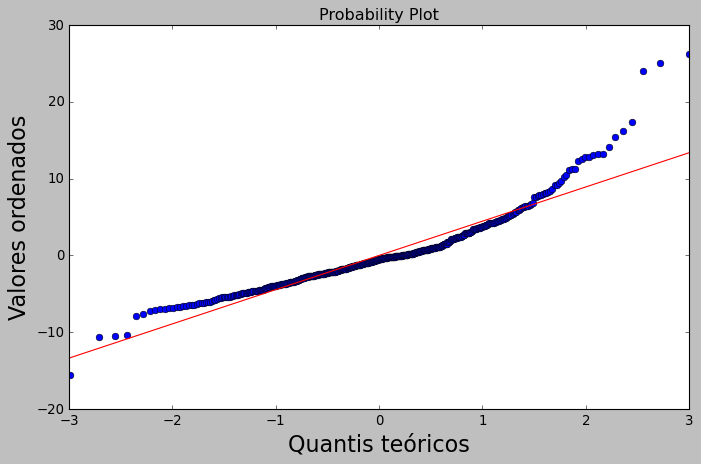

In [50]:
import scipy.stats as stats

plt.figure(figsize=(10,6))
stats.probplot(np.sort(residuals), dist="norm",plot=plt)

plt.xlabel('Quantis teóricos', fontsize = 20)
plt.ylabel('Valores ordenados',fontsize = 20)
plt.savefig('QQ.svg')
plt.show(True)

Por fim analisamos a relação dos resíduos com os valores preditos, verificando se os resíduos ocorrem de maneira aleatória:

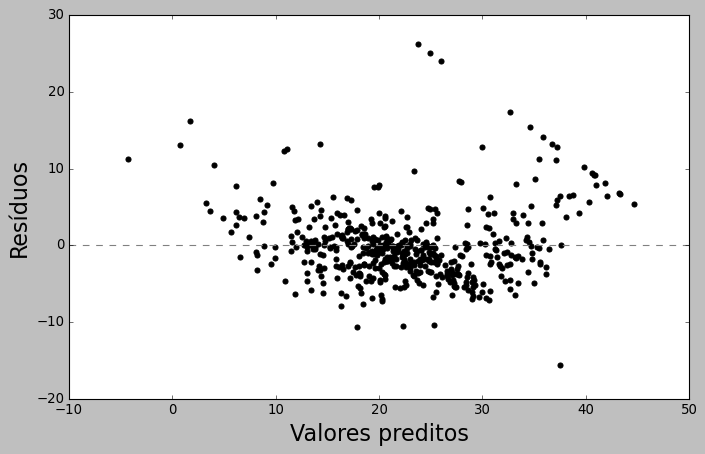

In [51]:
plt.figure(figsize=(10,6))

plt.scatter(model.fittedvalues, residuals,color='black')
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.xlabel('Valores preditos',fontsize = 20)
plt.ylabel('Resíduos', fontsize = 20)
plt.savefig('residuos-diagnosis.svg')
plt.show(True)


Vemos que existem alguns pontos que não parecem ser aleatŕoios, desse modo, pode haver outliers no conjunto

3 - Ajuste um modelo para a base de dados de propagandas (Advertising.csv) e faça a inferência. Todas as variáveis são importantes para o ajuste ou alguma delas pode ser descartada?

In [42]:
df2 = pd.read_csv("/home/edmurcn/Documentos/MeusProjetos/Fis._Estat._Comp./Intro._Ciencia_Dados/data/Advertising.csv", header=0, index_col=0)

df2.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Aplicando o último método utilizado para a base BostonHousing:

In [52]:
model_string =  df2.columns[0]
features = df2.columns[1:-1]
for s in features:
    model_string = model_string + '+' + s
model_string = df2.columns[-1] + '~' + model_string

model = ols(model_string, df2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 19 Sep 2023   Prob (F-statistic):           1.58e-96
Time:                        11:28:03   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

Então observamos pelo valor de p = 0.860, que newspaper não agrega ao modelo de previsão de vendas, evidenciando que seria um investimento falho, além disso, a rádio seria o meio de maior impacto nas vendas.

Realizando as mesma medidas para o dignóstico:

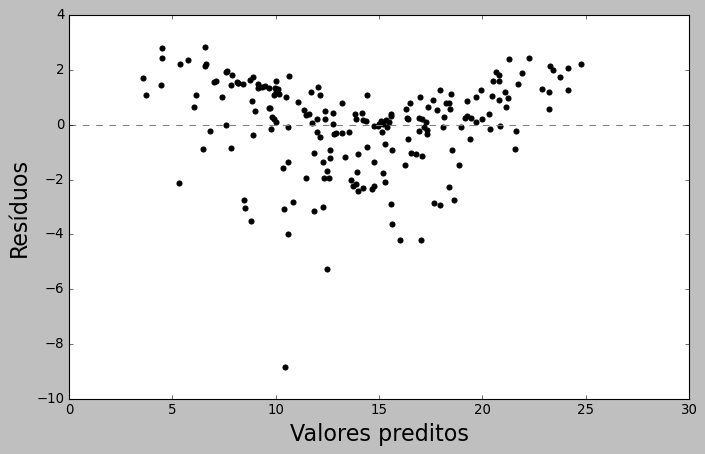

In [53]:
plt.figure(figsize=(10,6))

plt.scatter(model.fittedvalues, model.resid,color='black')
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.xlabel('Valores preditos',fontsize = 20)
plt.ylabel('Resíduos', fontsize = 20)
plt.savefig('residuos-diagnosis.svg')
plt.show(True)


Os resíduos parecem estarem dispersos aleatóriamente entre o 0, tirando alguns poucos outliers. Além disso, o R2 do modelos é bem significante evidenciando uma boa predição.